# Reading data (CSV format)

In [33]:
#Malay Rajpoot malay.rajpoot2020@vitstudent.ac.in
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [7]:
df=pd.read_csv('/content/drug200.csv')
print(df.head())
print('\n')
print(df.tail())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


     Age Sex      BP Cholesterol  Na_to_K   Drug
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX


# Data Preprocessing

In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

no null values are present so we can skip replacing null values step

In [3]:

names=['Age', 'Na_to_K']
print(names)


['Age', 'Na_to_K']


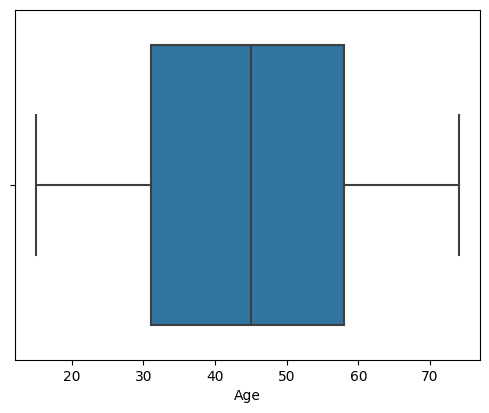

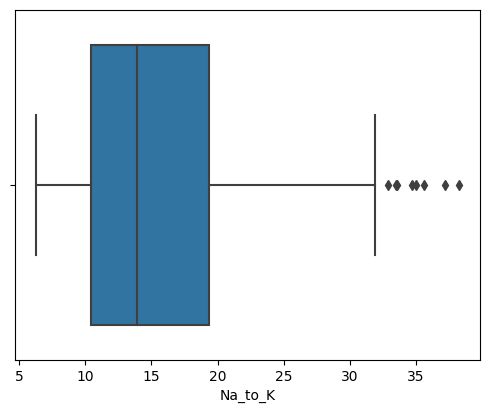

In [9]:
for i,j in enumerate(names):
  plt.figure(figsize=(6,10))
  plt.subplot(2,1,i+1)
  sns.boxplot(x=df[j],orient="h" )

As we can see there is outlier pesent in the Na_to_K column. So we will be using interquartile range (IQR) method to replace the outlier with median value. We are replacing the data because it is already a small data set, and decreasing or removing any data values may result in a loss in accuracy.

(200,)




<Axes: xlabel='Na_to_K'>

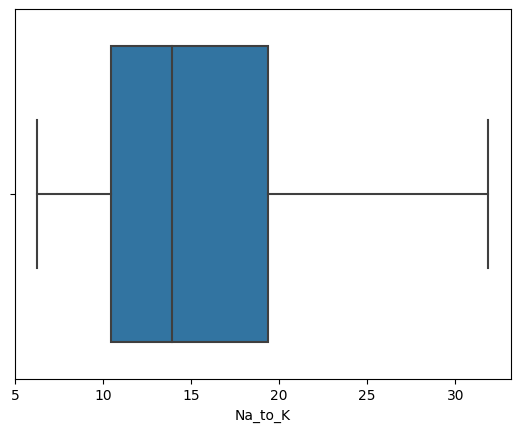

In [10]:
q1=df.Na_to_K.quantile(.25)    # lower quartile
q3=df.Na_to_K.quantile(.75)    # upper quartile
iqr=q3-q1                      # interquartile range (IQR)
upper_limit=q3+1.5*iqr         # setting the upper and lower limits of df
lower_limit=q3+1.5*iqr
df['Na_to_K']=np.where(df['Na_to_K']>upper_limit,30,df['Na_to_K'])
print(df['Na_to_K'].shape)
print('\n')
sns.boxplot(x=df['Na_to_K'],orient="h" )

Hence we can see that the outlier in Na_to_K is completely removed while the no.of data labels (observations) remain the same.

# Data Splitting

In [14]:
#check for unique values in categorical data
names2=['Sex', 'BP', 'Cholesterol', 'Drug']
for i,j in enumerate(names2):
  print(df[j].unique())
  print(df[j].value_counts())
  print('\n')

['F' 'M']
M    104
F     96
Name: Sex, dtype: int64


['HIGH' 'LOW' 'NORMAL']
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


['HIGH' 'NORMAL']
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64




In [16]:
#split independent and dependent data, here dependent is Drug, independent are Age, Sex, BP, Cholesterol and Na_to_K
x=df.iloc[:,0:5]
print(x.head())
y=df['Drug']
print(y[0:5])


   Age Sex      BP Cholesterol  Na_to_K
0   23   F    HIGH        HIGH   25.355
1   47   M     LOW        HIGH   13.093
2   47   M     LOW        HIGH   10.114
3   28   F  NORMAL        HIGH    7.798
4   61   F     LOW        HIGH   18.043
0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object


In [139]:
#splitting test and train data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

In [140]:
#Encoding categorical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
names3=['Sex', 'BP', 'Cholesterol' ]
for i,j in enumerate(names3):
  xtrain[j]=le.fit_transform(xtrain[j])
  xtest[j]=le.transform(xtest[j])
  print( xtrain[j]," ",xtest[j])

ytrain=le.fit_transform(ytrain)
ytest=le.transform(ytest)
ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)
print('\n')
print( ytrain," ",ytest)



176    1
111    0
114    0
14     0
106    1
      ..
120    1
112    1
48     1
4      0
56     1
Name: Sex, Length: 160, dtype: int64   144    1
9      1
17     1
20     1
45     0
6      0
52     1
91     1
129    0
183    0
21     1
42     1
105    1
145    1
87     1
152    1
124    0
92     0
101    0
13     0
108    1
75     1
40     0
198    1
191    1
192    1
194    0
117    0
2      1
131    1
19     0
143    1
147    0
22     1
102    0
60     0
136    0
168    0
138    1
54     0
Name: Sex, dtype: int64
176    0
111    2
114    2
14     2
106    2
      ..
120    2
112    1
48     2
4      1
56     0
Name: BP, Length: 160, dtype: int64   144    0
9      1
17     0
20     1
45     2
6      2
52     1
91     0
129    2
183    0
21     2
42     2
105    1
145    2
87     1
152    2
124    0
92     0
101    0
13     1
108    0
75     1
40     2
198    2
191    0
192    1
194    0
117    2
2      1
131    1
19     0
143    0
147    0
22     1
102    1
60     1
136    0
168    1

# Training and testing the Model

Finally we build an Artificial Neural Network (ANN) model based on the data we preprocessed.

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(45,input_dim=5, activation='relu'))
model.add(Dense(67,activation='relu'))
model.add(Dense(78,activation='relu'))
model.add(Dense(43,activation='relu'))
model.add(Dense(72,activation='relu'))
model.add(Dense(5,activation='softmax'))

print(model.summary())

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=6,epochs=48,validation_data=(xtest,ytest))

test_loss, test_acc = model.evaluate(xtest,ytest)
print('Test accuracy:', test_acc * 100)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 45)                270       
                                                                 
 dense_187 (Dense)           (None, 67)                3082      
                                                                 
 dense_188 (Dense)           (None, 78)                5304      
                                                                 
 dense_189 (Dense)           (None, 43)                3397      
                                                                 
 dense_190 (Dense)           (None, 72)                3168      
                                                                 
 dense_191 (Dense)           (None, 5)                 365       
                                                                 
Total params: 15,586
Trainable params: 15,586
Non-tra

In [145]:
test_loss, test_acc = model.evaluate(xtest,ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 6ms/step - loss: 0.4220 - accuracy: 0.8750
Test accuracy: 87.5


now we will test our model

In [223]:

import numpy as np

# ...

# Testing the model
y_pred = model.predict(xtest)

# Comparing predicted values to actual values
comp = pd.DataFrame({'Actual Value': ytest.tolist(), 'Predicted Value': y_pred.tolist()})
print(comp)

# Making predictions on new input
new_input = np.array([43, 1, 0, 1, 34.563]).reshape(1, -1)  # Reshape the input as a 2D array
prediction = model.predict(new_input)
print("Prediction:", prediction)

2/2 [==============================] - 0s 7ms/step
                 Actual Value  \
0   [0.0, 1.0, 0.0, 0.0, 0.0]   
1   [1.0, 0.0, 0.0, 0.0, 0.0]   
2   [0.0, 1.0, 0.0, 0.0, 0.0]   
3   [1.0, 0.0, 0.0, 0.0, 0.0]   
4   [0.0, 0.0, 0.0, 0.0, 1.0]   
5   [1.0, 0.0, 0.0, 0.0, 0.0]   
6   [1.0, 0.0, 0.0, 0.0, 0.0]   
7   [1.0, 0.0, 0.0, 0.0, 0.0]   
8   [0.0, 0.0, 0.0, 0.0, 1.0]   
9   [1.0, 0.0, 0.0, 0.0, 0.0]   
10  [1.0, 0.0, 0.0, 0.0, 0.0]   
11  [1.0, 0.0, 0.0, 0.0, 0.0]   
12  [0.0, 0.0, 0.0, 0.0, 1.0]   
13  [0.0, 0.0, 0.0, 0.0, 1.0]   
14  [1.0, 0.0, 0.0, 0.0, 0.0]   
15  [0.0, 0.0, 0.0, 0.0, 1.0]   
16  [0.0, 0.0, 1.0, 0.0, 0.0]   
17  [1.0, 0.0, 0.0, 0.0, 0.0]   
18  [0.0, 1.0, 0.0, 0.0, 0.0]   
19  [1.0, 0.0, 0.0, 0.0, 0.0]   
20  [0.0, 0.0, 1.0, 0.0, 0.0]   
21  [1.0, 0.0, 0.0, 0.0, 0.0]   
22  [1.0, 0.0, 0.0, 0.0, 0.0]   
23  [0.0, 0.0, 0.0, 0.0, 1.0]   
24  [0.0, 1.0, 0.0, 0.0, 0.0]   
25  [1.0, 0.0, 0.0, 0.0, 0.0]   
26  [1.0, 0.0, 0.0, 0.0, 0.0]   
27  [0.0, 0.0, 0.0, 0.0, 

Based on this model we will create a function for predicting the drug type

# User interface

In [226]:
def predDrug(age,Sex,BP,cholestrol,Na_toK):
  S={'F':0,'M':1}
  B={'HIGH':0,'LOW':1,'NORMAL':2}
  C={'HIGH':0,'NORMAL':1}
  # Making predictions on new input
  new_input = np.array([age, S.get(Sex), B.get(BP), C.get(cholestrol), Na_toK]).reshape(1, -1)  # Reshape the input as a 2D array
  prediction = model.predict(new_input)
  print("Prediction:", prediction)
  
  max=0.
  index=0
  prediction=prediction.T
  for i in prediction:
    if i>max:
     max=i
     index+=1
    
  D={1:'DrugY', 2:'drugC', 3:'drugX', 4:'drugA', 5:'drugB'}
  print("Prediction:", D.get(index))




In [227]:
predDrug( 23,'F','HIGH', 'HIGH',25.355)

1/1 [==============================] - 0s 38ms/step
Prediction: [[9.9999988e-01 3.2634617e-08 5.6415415e-12 7.9482206e-08 3.6074874e-09]]
Prediction: DrugY


In [228]:
predDrug( 19,'M','LOW', 'HIGH',53.2543)

1/1 [==============================] - 0s 21ms/step
Prediction: [[1.0000000e+00 1.1673929e-24 1.2388348e-32 8.2593944e-22 4.1777709e-25]]
Prediction: DrugY


In [229]:
predDrug( 41,'M','LOW', 'HIGH',11.037)

1/1 [==============================] - 0s 21ms/step
Prediction: [[0.22179934 0.19051576 0.0131206  0.4471395  0.12742475]]
Prediction: drugC
